<a href="https://www.kaggle.com/code/javiervargasgonzlez/environmental-analysis-report-on-global-emissions?scriptVersionId=254047659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Environmental Analysis Report on Global CO₂ Emissions in the World from 1949 to 2023


Climate change stands out as one of the greatest challenges of the 21st century. At the heart of this crisis are carbon dioxide (CO₂) emissions—primarily produced by burning fossil fuels—which are the leading driver of global warming. Scientists and policymakers agree that if we want to avoid the most devastating consequences of climate change, we must act quickly to reduce these emissions on a global scale.

However, the way we understand and respond to this issue often depends on how we measure emissions. Looking at annual emissions by country, comparing continents, or analyzing historical data across regions and populations can each paint a very different picture. These varied perspectives don't just shift the narrative—they can reveal important insights that help us understand the roots of the problem and guide us toward more effective solutions.



This analysis examines historical emissions trends by country, continent, and region, with the main goal of generating useful knowledge and developing strategies for decarbonization. These Data sets have been provided by [Our World in Data](https://ourworldindata.org/co2-emissions). After exploring, preparing, and cleaning the data, we now proceed to analyze it.



## How have global emissions of CO₂ changed over time?


Before the **Industrial Revolution**, global carbon dioxide (CO₂) emissions were remarkably low, hovering around 10-12 million tonnes per year, primarily from natural sources like volcanic activity and biological decomposition. Human impact was minimal. However, with the emergence of industrialization in the late 18th century, particularly the widespread adoption of **fossil fuels** like coal for energy production, emissions began a slow but steady increase.

A truly significant and accelerated growth in global CO₂ emissions didn't occur until the **mid-20th century**. This period, roughly from the 1950s onwards, is often referred to as the "Great Acceleration," marked by rapid industrial expansion, population growth, and a dramatic surge in global consumption patterns.

In **1950**, the world emitted approximately **6 billion tonnes of carbon dioxide** into the atmosphere. This substantial increase was directly linked to the booming post-World War II economy, increased energy demand for manufacturing and transportation, and a burgeoning consumer culture.

The rate of increase was staggering. Just **forty years later, by 1990**, global annual CO₂ emissions had almost quadrupled, reaching over **22 billion tonnes**. This exponential rise was driven by continued reliance on fossil fuels, the globalization of industrial production, and the proliferation of energy-intensive technologies.

The upward trend in global emissions has unfortunately persisted into the 21st century. While there have been occasional plateaus or minor dips, often linked to economic downturns, the overall trajectory continues to rise. We are now approaching, and in some recent years have even exceeded, **40 billion tonnes of carbon dioxide emitted globally per year**. This relentless increase underscores the urgent need for comprehensive global strategies to transition to sustainable energy sources and mitigate the impacts of climate change.


In [1]:
import pandas as pd
# Uploading the CSV
df = pd.read_csv('/kaggle/input/co2-emissions/co_emissions.csv')

# Let's show the first rows
print (df.head())

# Now let's take a look at the general information of the dataset
print(df.info())

# Let's see the unique columns
print(df.columns)

        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB
None
Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')


In [2]:
# There are some null values
new_df = df.dropna()

# Now let's look at the info of the dataset
print(new_df.info())

# The New DataFrame
print(new_df)

<class 'pandas.core.frame.DataFrame'>
Index: 23497 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                23497 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  23497 non-null  int64  
 3   Annual CO₂ emissions  23497 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 917.9+ KB
None
            Entity Code  Year  Annual CO₂ emissions
0      Afghanistan  AFG  1949               14656.0
1      Afghanistan  AFG  1950               84272.0
2      Afghanistan  AFG  1951               91600.0
3      Afghanistan  AFG  1952               91600.0
4      Afghanistan  AFG  1953              106256.0
...            ...  ...   ...                   ...
29132     Zimbabwe  ZWE  2019            10262950.0
29133     Zimbabwe  ZWE  2020             8494503.0
29134     Zimbabwe  ZWE  2021            10203630.0
29

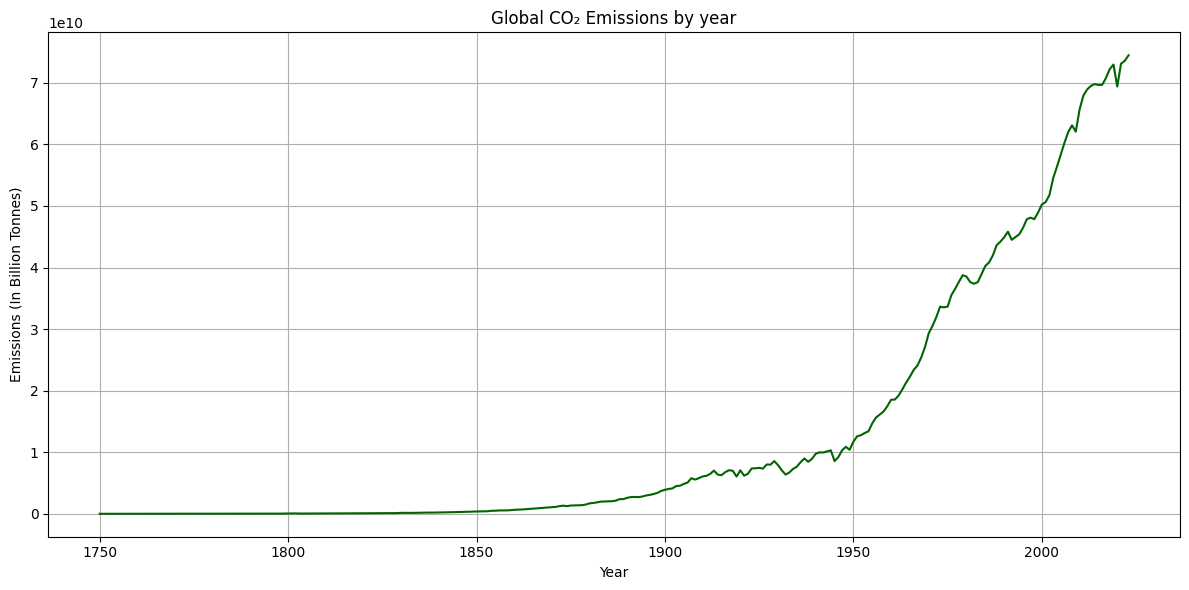

In [3]:
import matplotlib.pyplot as plt
# Grouping by year and adding the emissions
emissions_by_year = new_df.groupby('Year')['Annual CO₂ emissions']. sum()

# Visualizing the trend
plt.figure(figsize = (12, 6))
emissions_by_year.plot(kind = 'line', color = 'darkgreen')
plt.title('Global CO₂ Emissions by year')
plt.xlabel('Year')
plt.ylabel('Emissions (In Billion Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

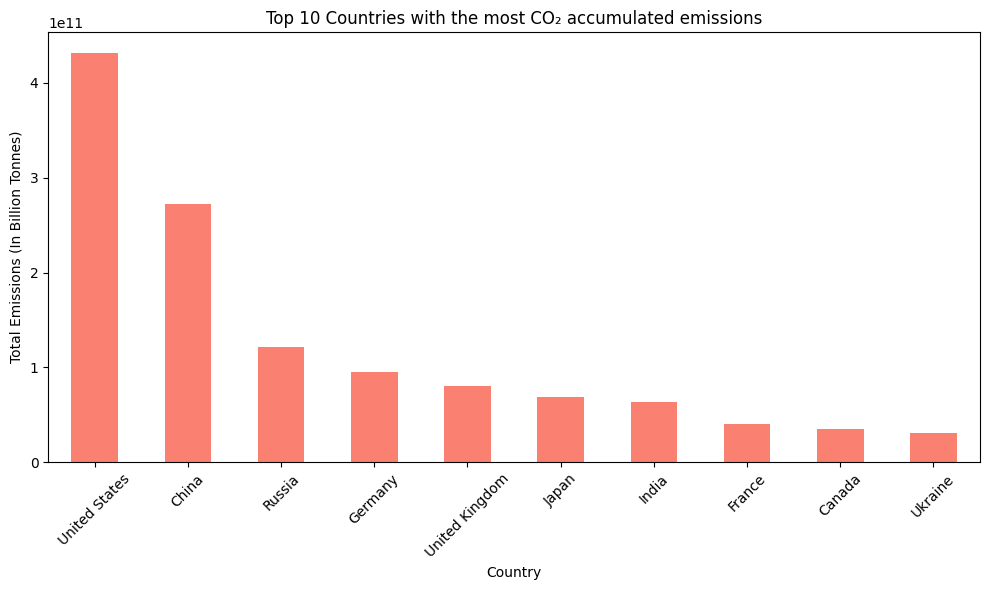

In [4]:
# Eliminating some data that might not be useful at the moment
exclude = ['World', 'Asia', 'Africa', 'Europe', 'International Transport', 'North America', 'South America', 'Oceania']

new_df = new_df[~new_df ['Entity'].isin(exclude)]

# Grouping by country and adding all their emissions
emissions_by_country = new_df.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending = False)

# Showing the first 10 countries
top_10 = emissions_by_country.head(10)

# Bar Graph
top_10.plot(kind = 'bar', figsize = (10, 6), color = 'salmon' )
plt.title('Top 10 Countries with the most CO₂ accumulated emissions')
plt.xlabel('Country')
plt.ylabel('Total Emissions (In Billion Tonnes)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## The Enduring Legacy of Carbon Emissions and Climate Justice


The impact of Carbon Dioxide (CO₂) is a long-lasting one, once released into the atmosphere, CO₂ can persist for centuries, with a significant fraction remaining for thousands of years, according to investigations made by [NASA](https://science.nasa.gov/earth/climate-change/greenhouse-gases/the-atmosphere-getting-a-handle-on-carbon-dioxide/), and [Archer, D. et al](https://climatemodels.uchicago.edu/geocarb/archer.2009.ann_rev_tail.pdf). This means that the CO₂ produced during the industrialization of the 1800s is still contributing to global warming today and is an important factor in the climate change impacts. This long atmospheric lifetime underscores the cumulative nature of climate change, where past actions have profound and lasting consequences.

While it's necessary to focus on **current emissions** because they represent our immediate opportunities of mitigation, it is equally vital to acknowledge and understand the historical contributions made by different nations. The Industrial Revolution, beginning in the late 18th century, was powered by burning fossil fuels, particularly coal. This historical development pathway, while crucial in their economic prosperity, also resulted in significant cumulative CO₂ emissions. 

Consequently, while historically industrialized nations might account of a relatively smaller share of the *current* global emissions compared to rapidly developing economies, their cumulative historical emissions are substantially higher. For example, the United States alone accounts for approximately **24%**  of global cumulative CO₂ emissions since the pre-industrial era with the European Union collectively contributing around **17%** and the United Kingdom approximately **4.4%** This contrasts with the much lower cumulative contributions of many developing nations.

This historical context profoundly affects discussions about **climate responsibility and equitable action today**. The reality is that for the world to effectively tackle climate change and limit global warming to safe levels, developing nations cannot simply replicate the high-carbon development pathways that industrialized countries historically pursued. Expecting them to choose between economic development, poverty reduction, and maintaining low emissions presents an unacceptable dilemma. Therefore, a critical imperative is to ensure that **low-carbon energy options and sustainable development pathways become demonstrably cheaper and more accessible than fossil fuels**, enabling developing nations to lift their populations out of poverty without locking into high-emission trajectories.

Given their historical role in driving climate change and their accumulated wealth and technological capacity, **rich countries have a responsibility to play a leading role**. This involves not only drastically **reducing their own domestic emissions** but also actively **financing and investing in the development and deployment of low-carbon technologies and infrastructure in developing countries**. They can use their wealth, established research and development capabilities, and existing infrastructure, which were themselves largely built upon and benefited from carbon-intensive activities, to foster innovative, low-carbon solutions and facilitate their transfer to the rest of the world. This approach aligns with the principle of Common But Differentiated Responsibilities and Respective Capabilities (CBDR-RC), recognizing that all nations have a shared responsibility to address climate change, but their capacities and historical contributions vary.


These are the top five countries that have historically contributed the most CO₂ emissions to the atmosphere:   

## 1. United States

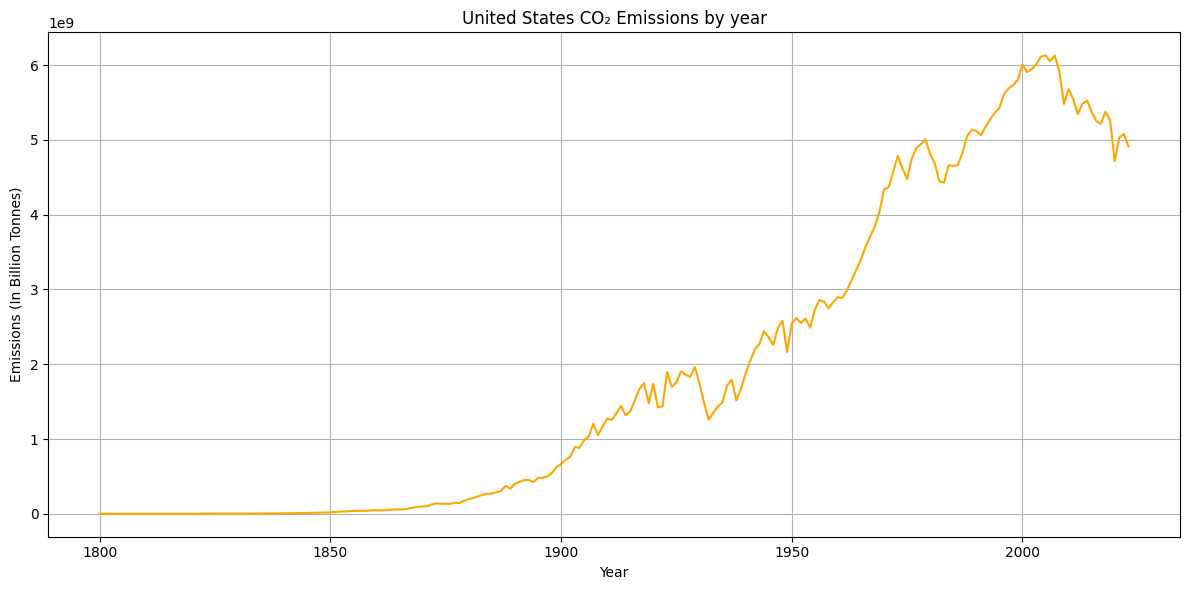

In [5]:
# Filtering by country
united_states = new_df[new_df['Entity'] == 'United States']

# Visualizing the data
plt.figure(figsize = (12, 6))
plt.plot(united_states['Year'], united_states['Annual CO₂ emissions'], color = 'orange')
plt.title('United States CO₂ Emissions by year')
plt.xlabel('Year')
plt.ylabel('Emissions (In Billion Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. China

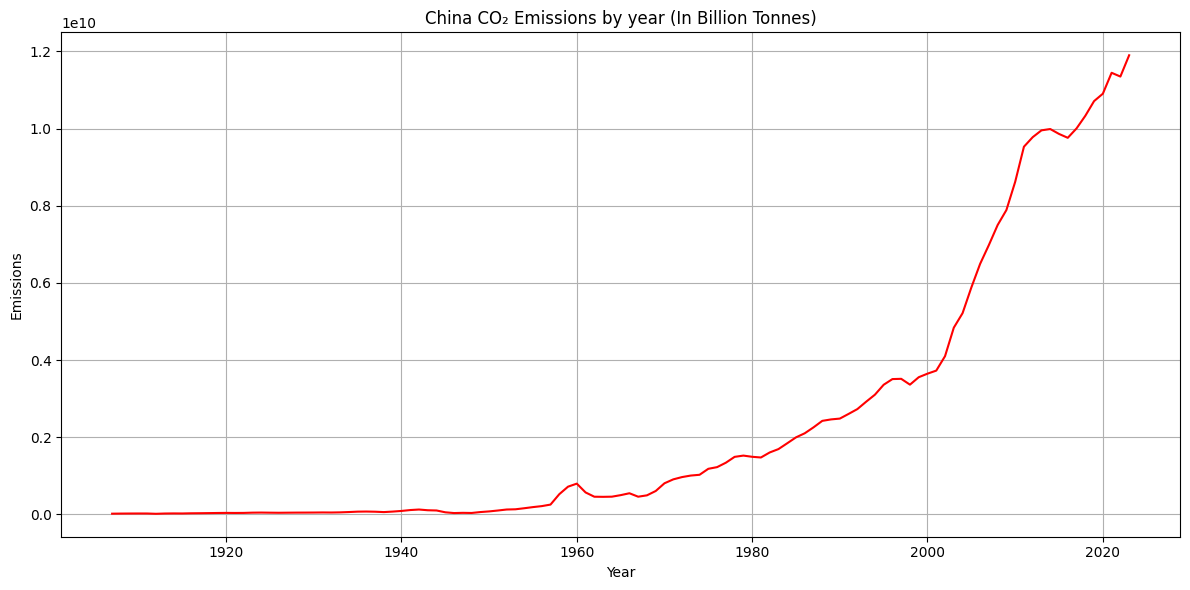

In [6]:
# Filtering by country
china = new_df[new_df['Entity'] == 'China']

# Visualizing the data
plt.figure(figsize = (12, 6))
plt.plot(china['Year'], china['Annual CO₂ emissions'], color = 'red')
plt.title('China CO₂ Emissions by year (In Billion Tonnes)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Russia

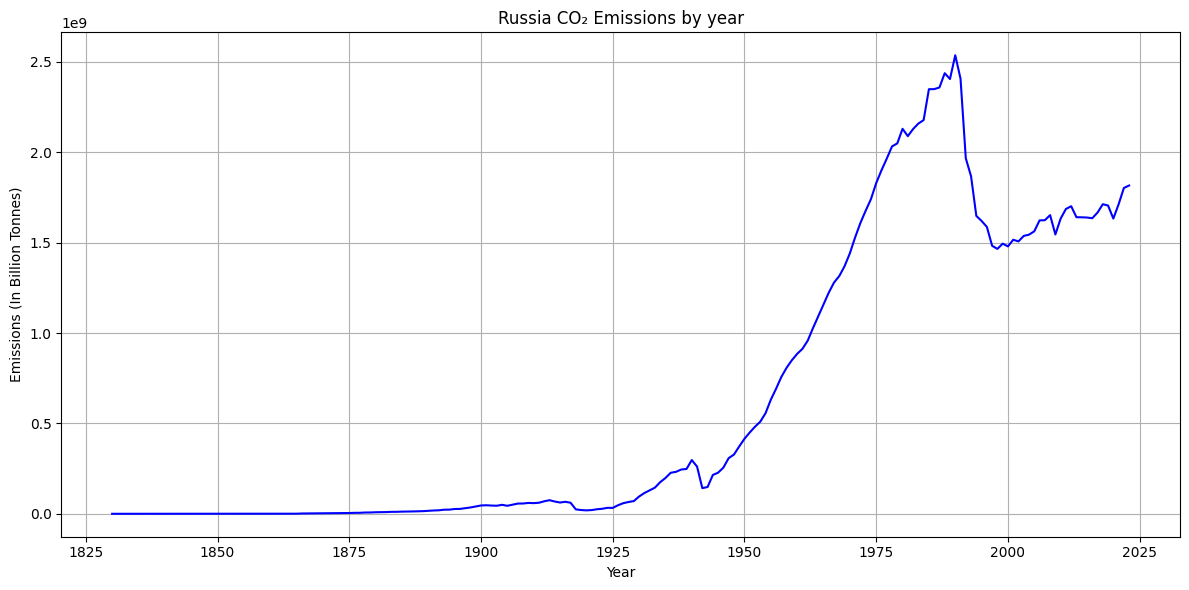

In [7]:
# Filtering by country
russia = new_df[new_df['Entity'] == 'Russia']

# Visualizing the data
plt.figure(figsize = (12, 6))
plt.plot(russia['Year'], russia['Annual CO₂ emissions'], color = 'blue')
plt.title('Russia CO₂ Emissions by year')
plt.xlabel('Year')
plt.ylabel('Emissions (In Billion Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Germany

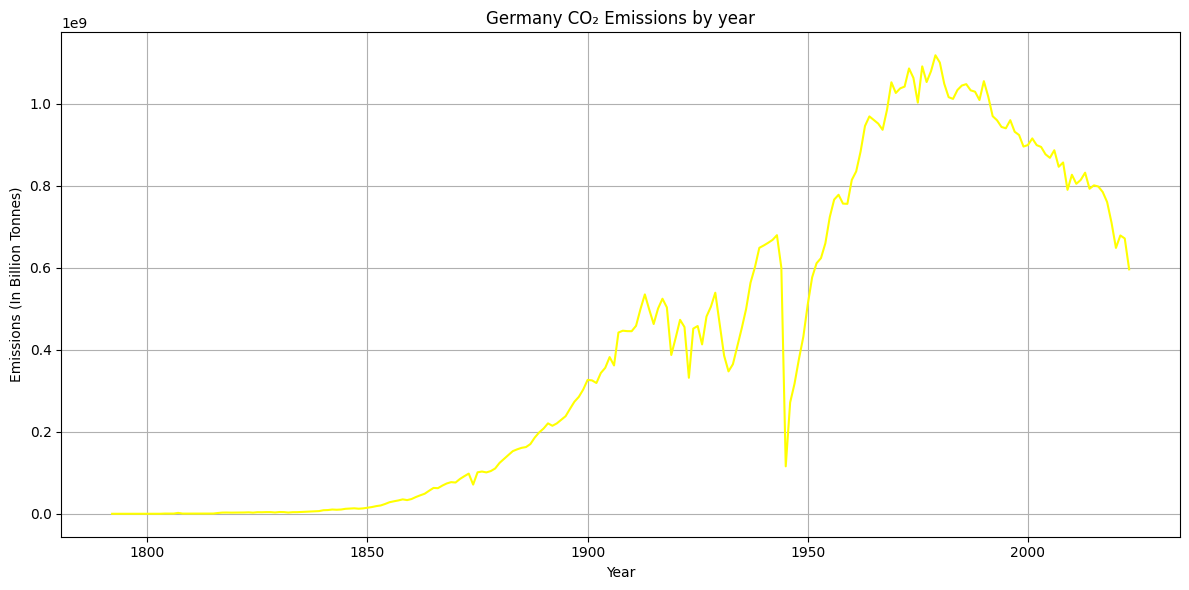

In [8]:
# Filtering by country
germany = new_df[new_df['Entity'] == 'Germany']

# Visualizing the data
plt.figure(figsize = (12, 6))
plt.plot(germany['Year'], germany['Annual CO₂ emissions'], color = 'yellow')
plt.title('Germany CO₂ Emissions by year')
plt.xlabel('Year')
plt.ylabel('Emissions (In Billion Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. United Kingdom

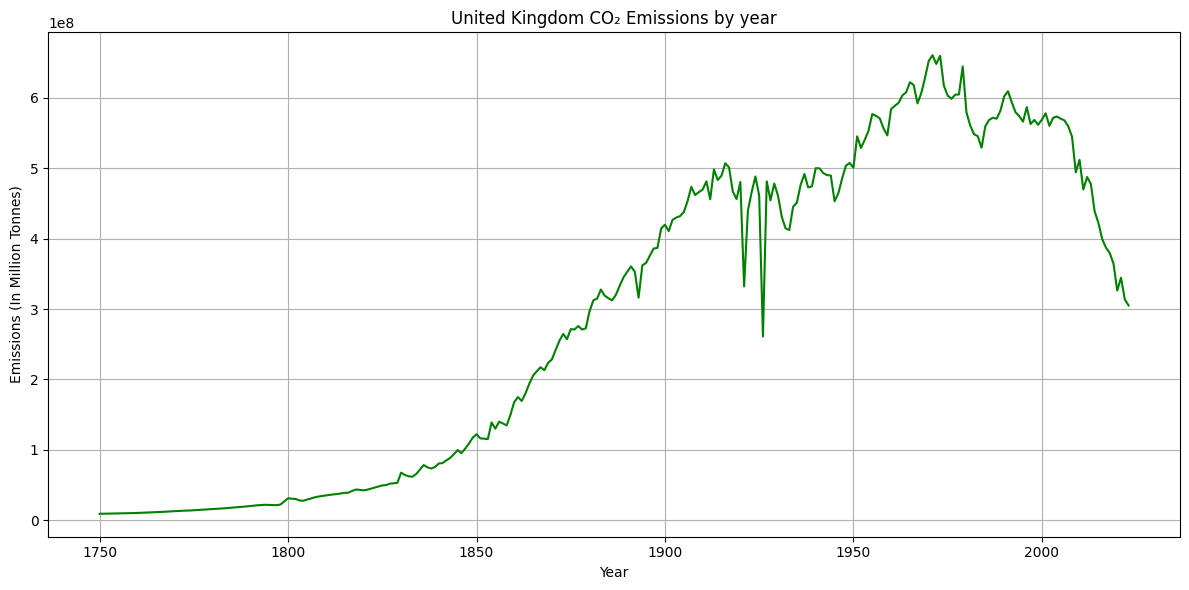

In [9]:
# Filtering by country
united_kingdom = new_df[new_df['Entity'] == 'United Kingdom']

# Visualizing the data
plt.figure(figsize = (12, 6))
plt.plot(united_kingdom['Year'], united_kingdom['Annual CO₂ emissions'], color = 'green')
plt.title('United Kingdom CO₂ Emissions by year')
plt.xlabel('Year')
plt.ylabel('Emissions (In Million Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

To better understand the contribution of every continent to the Global Carbon Dioxide emissions, we need to process the data:

In [10]:
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.6/243.6 kB 10.1 MB/s eta 0:00:00


In [11]:
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania'
        }.get(continent_code, 'Other')
        return continent_name
    except:
        return 'Other' # Countries without any clear assignment like "World" or "International Transport"
# Apply to the DataFrame
new_df['Continent'] = new_df['Entity'].apply(get_continent)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

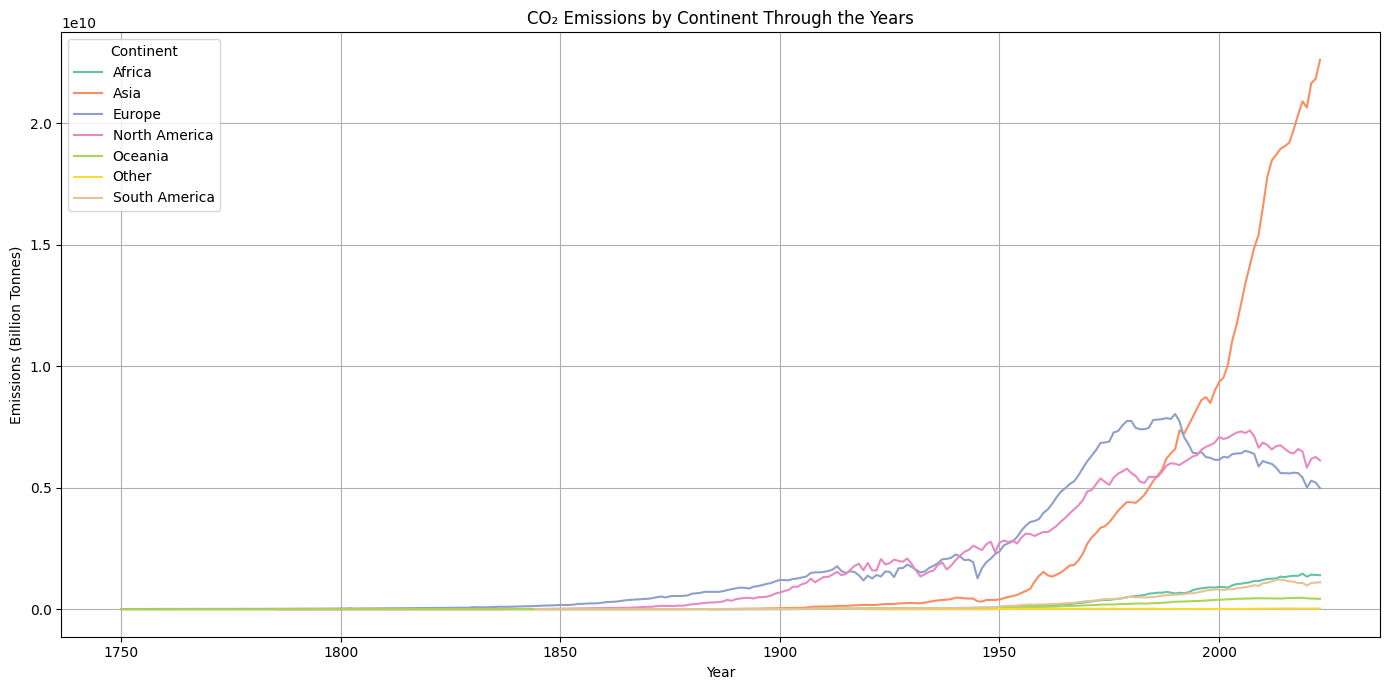

In [12]:
# Grouping by continent and by year
emissions_continent_year = new_df.groupby(['Continent', 'Year'])['Annual CO₂ emissions'].sum().reset_index()

# Visualizing with Seaborn
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=emissions_continent_year, x='Year', y='Annual CO₂ emissions', hue='Continent', palette='Set2')
plt.title('CO₂ Emissions by Continent Through the Years')
plt.ylabel('Emissions (Billion Tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()

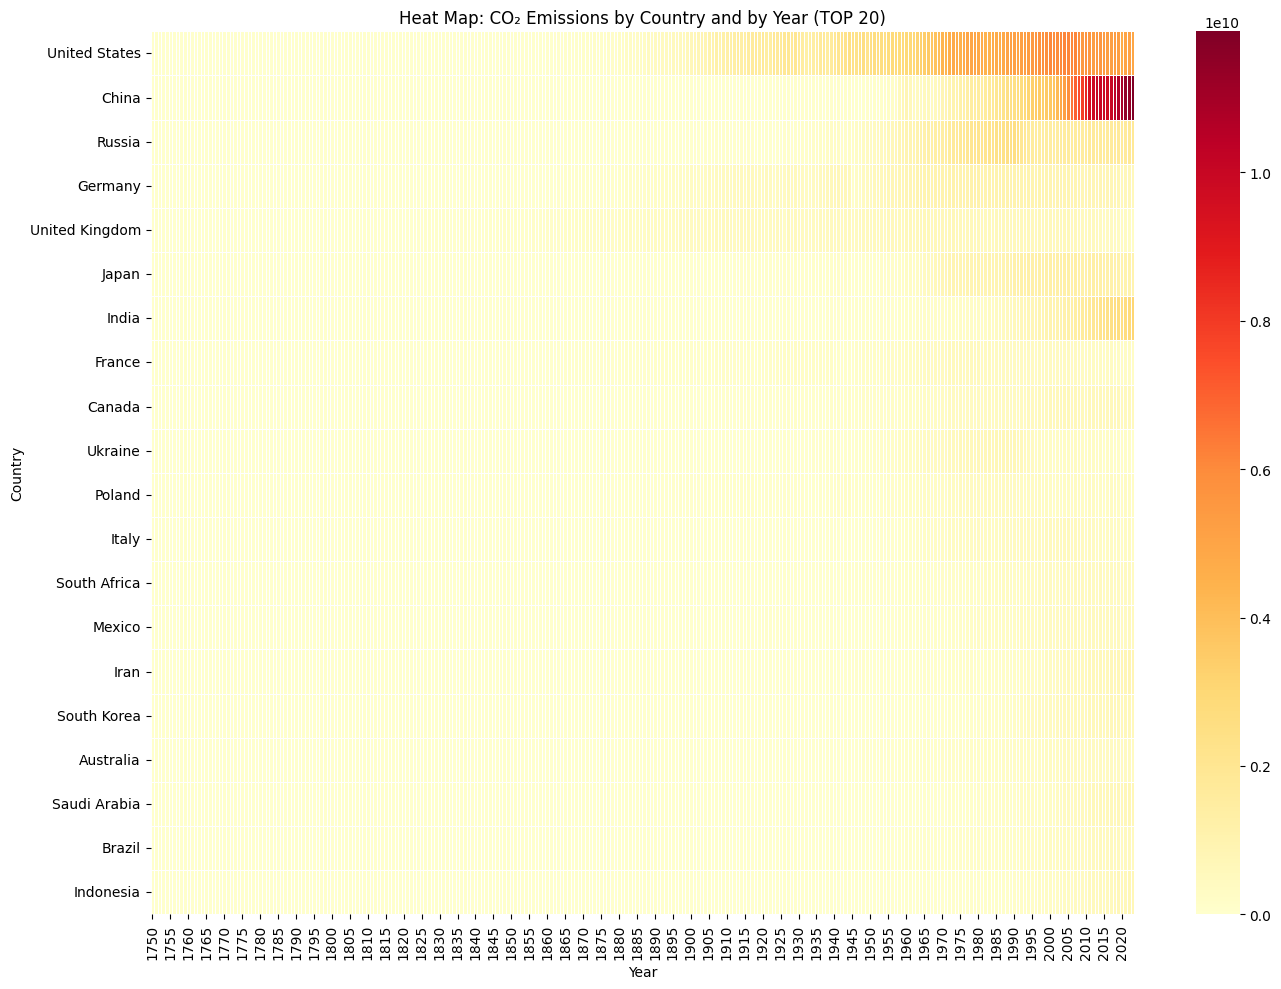

In [13]:
# Eliminating some data that might not be useful at the moment
exclude = ['World', 'Asia', 'Africa', 'Europe', 'International Transport', 'North America', 'South America', 'Oceania']

new_df = new_df[~new_df ['Entity'].isin(exclude)]

# Creating a Pivot Table
pivot = new_df.pivot_table(index = 'Entity', columns = 'Year', values = 'Annual CO₂ emissions', aggfunc = 'sum').fillna(0)

# Selecting the countries with the most emissions
top_countries = pivot.sum(axis = 1).sort_values(ascending = False). head(20)
pivot_top = pivot.loc[top_countries.index]

plt.figure(figsize = (14,10))
sns.heatmap(pivot_top, cmap = 'YlOrRd', linewidths = 0.5)
plt.title('Heat Map: CO₂ Emissions by Country and by Year (TOP 20)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd

coords_df = pd.read_csv('https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv')
coords_df.rename(columns={'name': 'Entity', 'country': 'ISO2'}, inplace=True)

In [15]:
import pycountry

def iso3_to_iso2(iso3):
    try:
        return pycountry.countries.get(alpha_3=iso3).alpha_2
    except:
        return None

new_df['ISO2'] = new_df['Code'].apply(iso3_to_iso2)

In [16]:
df_merged = pd.merge(new_df, coords_df[['ISO2', 'latitude', 'longitude']], on='ISO2', how='left')

## Global CO₂ Emissions Map of the World

In 2023, China stood as the world's largest emitter of carbon dioxide (CO₂), releasing an estimated of 11.9 billion metric tons (GtCO₂). Following as the second-largest emitter, the United States contributed 4.9 GtCO₂ in 2023. Notably, U.S. CO₂ emissions have seen a 13% decline since 2010, indicating a shift in it's emissions trajectory. In contrast, China's CO₂ emissions experienced a substantial increase of over 38% during the same period of time.

A primary driver of global CO₂ emissions is the power sector, with electricity generation from coal-fired power plants being a particularly significant contributor. In China, emissions specifically from coal-fired electricity generation have risen dramatically since the beginning of the 21st century, reaching 5.2 GtCO₂ in 2023. This highlights the ongoing reliance on coal as a major energy source in the country and its substantial impact on global emissions.

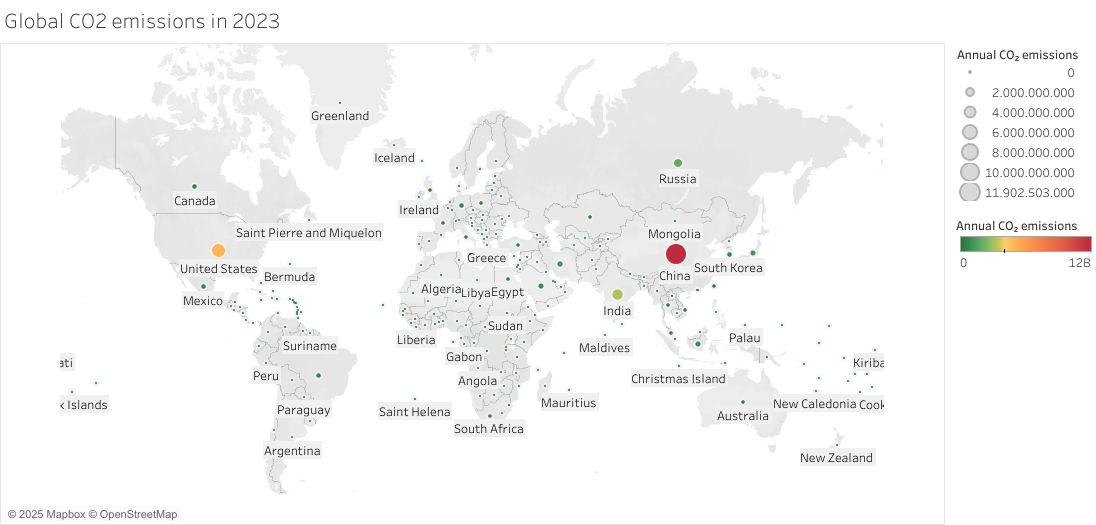

This Graphic can be visualized in [Tableau](https://public.tableau.com/views/GlobalCO2emissionsin2023/Hoja1?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) 

## Conclusions

Reducing carbon emissions is a critical global challenge in the fight against climate change. The continuous rise in emissions means we must act swiftly to mitigate environmental impacts. This effort isn't just about stopping new emissions; it also requires managing the greenhouse gases that have already accumulated in the atmosphere and will linger for centuries.

Addressing this challenge requires a shared responsibility among all nations. While every country must take action to reduce its emissions, it's also clear that developing nations may struggle to keep up with these demands and are often the most vulnerable to the devastating effects of climate change.

In this context, wealthier countries are uniquely positioned to lead the way. They have the resources and infrastructure to research and develop low-cost, low-carbon technologies. By sharing these innovations, they can help developing nations reduce their emissions without hindering economic growth.

Ultimately, climate change is a shared problem that requires a unified solution. It's essential that we develop a global understanding of this crisis and work together to create strong policies and regulations that reduce pollution and the over-exploitation of natural resources. This collaborative effort is the only way to build a sustainable future for everyone. 

## Sources


- Archer, David, et al., "Atmospheric Lifetime of Fossil Fuel Carbon Dioxide." Annual Review of Earth and Planetary Sciences, Volume 37, 2009, doi:10.1146/annurev.earth.031208.100206. See also, Inman, Mason, "Carbon is forever." Nature Climate Change, Volume 1, 2008, doi:10.1038/climate.2008.122. [https://climatemodels.uchicago.edu/geocarb/archer.2009.ann\_rev\_tail.pdf]
- Carbon dioxide emissions of the most polluting countries worldwide in 2010 and 2023.
Ian Tiseo, July 10, 2025, Retrieved July 27, 2025. (https://www.statista.com/statistics/270499/co2-emissions-in-selected-countries/)
- Global Carbon Budget (2024) – with major processing by Our World in Data. “Annual CO₂ emissions by world region – GCB” (dataset). Global Carbon Project, “Global Carbon Budget” [original data]. Retrieved July 1, 2025 from (https://archive.ourworldindata.org/20250624-125417/grapher/annual-co-emissions-by-region.html) (archived on June 24, 2025).
- Global Carbon Project (2003) Science Framework and Implementation. Earth System Science Partnership (IGBP, IHDP, WCRP, DIVERSITAS) Report No. 1; Global Carbon Project Report No. 1, 69pp, Canberra.
- NASA Science: "The Atmosphere: Getting a Handle on Carbon Dioxide." (2019).[https://science.nasa.gov/earth/climate-change/greenhouse-gases/the-atmosphere-getting-a-handle-on-carbon-dioxide/](https://science.nasa.gov/earth/climate-change/greenhouse-gases/the-atmosphere-getting-a-handle-on-carbon-dioxide/). Retrieved July 27, 2025.
- MIT Climate Portal: "How do we know how long carbon dioxide remains in the atmosphere?"(2023). [https://climate.mit.edu/ask-mit/how-do-we-know-how-long-carbon-dioxide-remains-atmosphere](https://climate.mit.edu/ask-mit/how-do-we-know-how-long-carbon-dioxide-remains-atmosphere). Retrieved July 27, 2025.

### Curious about the sources of the data?


Edouard Mathieu and Lucas Rodés-Guirao (2022) - “What are the sources for Our World in Data's population estimates?” Published online at OurWorldinData.org. Retrieved from: 'https://ourworldindata.org/population-sources' 